In [1]:
import numpy as np
import gym
import math
import torch as T
import random
from EnvGym import MyEnv
from sac_agent import SAC_Agent
import time
import matplotlib.pyplot as plt

In [2]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 200

dt = 1/ N_prices # time step

In [3]:
env = MyEnv(s0, sigma, dt, N_prices, A, k)

agent = SAC_Agent([N_prices - 1, 3], env=env, memory_size=50000, alpha= 0.008, beta= 0.008, tau = 0.0005, reward_scale=5, batch_size=7)

train_start = time.time()
epochs_start = time.time()

epoch_num = 30


train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):

    states_before, actions, rewards, states_next, dones = [], [], [], [], []

    # print("EPOCH: ", epoch)
    
    env.reset()


    # --------------------------------------------- now i have state I am at now
    done = False
    while not done:

        # print("State now: ", env.state_now)

        action = agent.pick_action(env.state_now)
        # print("ACTION: ", action)
        state_now = env.state_now
   
        # --------------------------------------------- now i also have action I would like to take
            
        state_next, reward, done, _, _ = env.step(action)

        # print("State I arrived: ", env.state_now)
        # print("Real state I arrived: ", env.state_now[0]*100, env.state_now[1], env.state_now[2]*100)
        # print("Reward I gained: ", reward)

        # if reward>=0:
        #     reward *=2 
        states_before.append(state_now)       
        actions.append(action)       
        rewards.append(reward)       
        states_next.append(state_next)       
        dones.append(done)       
        
    agent.remember(states_before, actions, rewards, states_next, dones)
    # print("Total reward: ", env.reward_total)
    agent.learn()



    # save cumulative reward for epoch
    train_rewards[epoch] = env.reward_total
    # print(env.reward_total)
    # print()


C:\Users\dusan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


BEFORE 5, now:  199 5
BEFORE 5, now:  199 5
value_next:  torch.Size([7, 199])
done:  torch.Size([7, 199])
state size:  torch.Size([7, 199, 3])
action size:  torch.Size([7, 199, 2])
BEFORE: torch.Size([28, 5]) and now:  torch.Size([7, 199, 5])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1393x5 and 199x5)

In [ ]:
train_rewards
epoch
# np.mean(train_rewards)


9

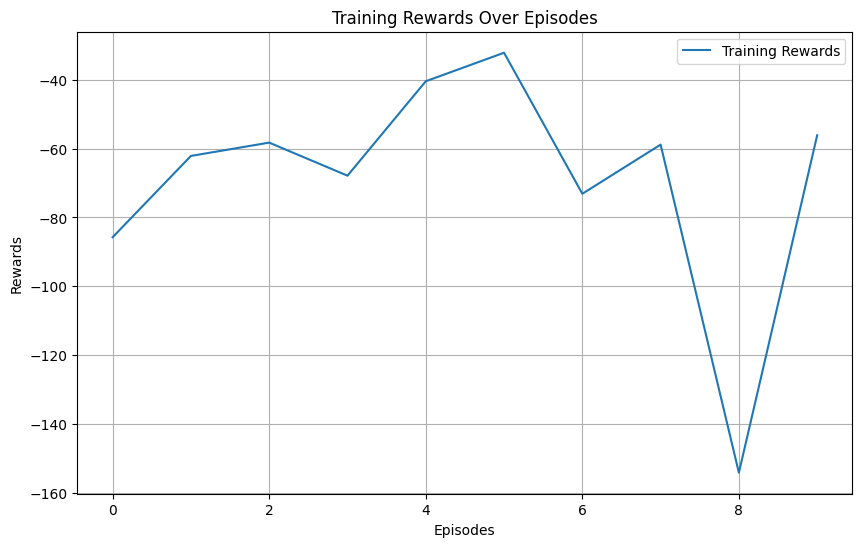

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_rewards[:48],  label='Training Rewards', linestyle='-')
plt.title('Training Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.grid(True)
plt.savefig('training_rewards_plot.png')
plt.show()

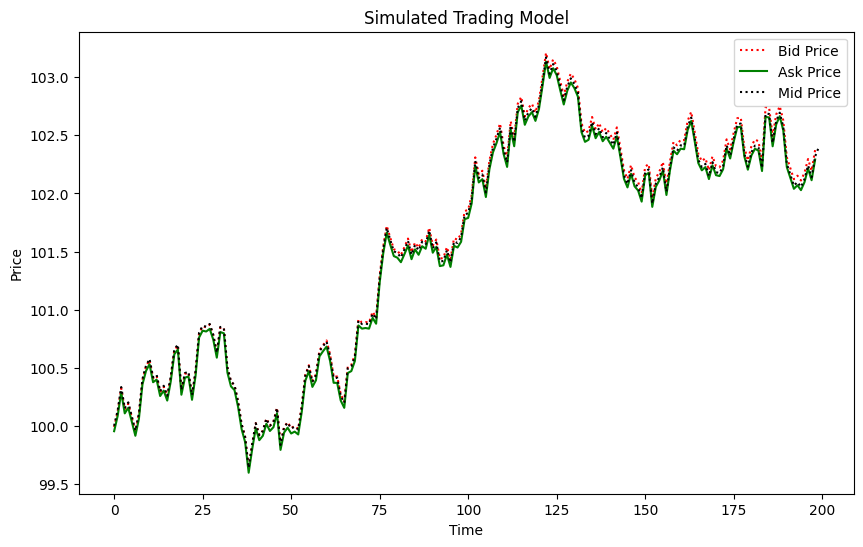

In [ ]:
plt.figure(figsize=(10, 6))
# plt.plot(t, res_price_array, label='Res Price')

plt.plot(env.Bid, label='Bid Price', color='red', linestyle='dotted')
plt.plot(env.Ask, label='Ask Price', color='green', linestyle='-')
plt.plot(env.s, label='Mid Price', color='black', linestyle='dotted')

plt.title('Simulated Trading Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()